In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/city_day.csv')

# Display the first few rows
print(data.head())


        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [ ]:
# Display dataset information
print(data.info())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None
City              0
Date              0
PM2.5          4598
PM10          11140
NO             

In [ ]:
# Remove rows with 4 or more missing values
threshold_missing = 4
filtered_data = data[data.isnull().sum(axis=1) < threshold_missing]

# Check the shape of the filtered dataset
print("Filtered Data Shape:", filtered_data.shape)


Filtered Data Shape: (22238, 16)


In [ ]:
# Define pollutant columns
pollutant_columns = [
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
    'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'
]

# Fill missing values with mean
filtered_data[pollutant_columns] = filtered_data[pollutant_columns].fillna(filtered_data[pollutant_columns].mean())

# Forward fill for any remaining missing values
filtered_data = filtered_data.fillna(method='ffill')

# Verify that there are no missing values left
print(filtered_data.isnull().sum())


City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


<ipython-input-4-06cd93ad62cf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[pollutant_columns] = filtered_data[pollutant_columns].fillna(filtered_data[pollutant_columns].mean())
<ipython-input-4-06cd93ad62cf>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filtered_data = filtered_data.fillna(method='ffill')


In [ ]:
# Check the shape of the dataset to ensure rows are not removed unexpectedly
print(filtered_data.shape)

# Display a sample of the dataset
print(filtered_data.head())


(22238, 16)
         City        Date   PM2.5        PM10     NO    NO2    NOx        NH3  \
28  Ahmedabad  2015-01-29   83.13  116.876931   6.93  28.71  33.72  23.811711   
29  Ahmedabad  2015-01-30   79.84  116.876931  13.85  28.68  41.08  23.811711   
30  Ahmedabad  2015-01-31   94.52  116.876931  24.39  32.66  52.61  23.811711   
31  Ahmedabad  2015-02-01  135.99  116.876931  43.48  42.08  84.57  23.811711   
32  Ahmedabad  2015-02-02  178.33  116.876931  54.56  35.31  72.80  23.811711   

       CO    SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
28   6.93  49.52   59.76     0.02     0.00    3.14  209.0       Poor  
29  13.85  48.49   97.07     0.04     0.00    4.81  328.0  Very Poor  
30  24.39  67.39  111.33     0.24     0.01    7.67  514.0     Severe  
31  43.48  75.23  102.70     0.40     0.04   25.87  782.0     Severe  
32  54.56  55.04  107.38     0.46     0.06   35.61  914.0     Severe  


In [ ]:
# Fill missing values with the mean for pollutant columns
filtered_data.loc[:, pollutant_columns] = filtered_data[pollutant_columns].fillna(filtered_data[pollutant_columns].mean())

# Forward fill for any remaining missing values
filtered_data = filtered_data.ffill()

# Verify there are no missing values
print(filtered_data.isnull().sum())


City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


In [ ]:
# Create a new feature for total particulate matter
filtered_data['PM'] = filtered_data['PM2.5'] + filtered_data['PM10']


In [ ]:
import numpy as np

# Apply log transformation to pollutants with high skewness
filtered_data['PM2.5_log'] = filtered_data['PM2.5'].apply(lambda x: np.log(x + 1))
filtered_data['PM10_log'] = filtered_data['PM10'].apply(lambda x: np.log(x + 1))


In [ ]:
# Convert 'Date' column to datetime
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])

# Extract year, month, and day of week
filtered_data['Year'] = filtered_data['Date'].dt.year
filtered_data['Month'] = filtered_data['Date'].dt.month
filtered_data['DayOfWeek'] = filtered_data['Date'].dt.dayofweek


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select pollutant columns for scaling
pollutant_columns = [
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
    'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene'
]

# Apply standard scaling
scaler = StandardScaler()
filtered_data[pollutant_columns] = scaler.fit_transform(filtered_data[pollutant_columns])


In [ ]:
print(filtered_data.head())


         City       Date     PM2.5          PM10        NO       NO2  \
28  Ahmedabad 2015-01-29  0.301028 -1.839492e-16 -0.490527 -0.057453   
29  Ahmedabad 2015-01-30  0.246121 -1.839492e-16 -0.187954 -0.058656   
30  Ahmedabad 2015-01-31  0.491120 -1.839492e-16  0.272902  0.100981   
31  Ahmedabad 2015-02-01  1.183226 -1.839492e-16  1.107602  0.478816   
32  Ahmedabad 2015-02-02  1.889851 -1.839492e-16  1.592070  0.207272   

         NOx           NH3        CO       SO2  ...   Toluene    Xylene  \
28  0.024615  1.645111e-16  0.607357  2.073492  ... -0.496942 -0.099209   
29  0.263917  1.645111e-16  1.543466  2.012905  ... -0.496942  0.278423   
30  0.638803  1.645111e-16  2.969273  3.124644  ... -0.496423  0.925144   
31  1.677949  1.645111e-16  5.551688  3.585810  ... -0.494865  5.040646   
32  1.295260  1.645111e-16  7.050544  2.398190  ... -0.493827  7.243118   

      AQI  AQI_Bucket          PM PM2.5_log  PM10_log  Year  Month  DayOfWeek  
28  209.0        Poor  200.006931  4

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# Define features (X) and target (y)
X = filtered_data.drop(['AQI', 'City', 'Date', 'AQI_Bucket'], axis=1)  # Exclude target and irrelevant columns
y = filtered_data['AQI']


In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (17790, 18)
X_test shape: (4448, 18)
y_train shape: (17790,)
y_test shape: (4448,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')


Mean Absolute Error (MAE): 30.867137706946725
Root Mean Squared Error (RMSE): 53.041111775855775
R² Score: 0.8575781246059628


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)


In [ ]:
# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print(f'Random Forest - Mean Absolute Error (MAE): {mae_rf}')
print(f'Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'Random Forest - R² Score: {r2_rf}')


Random Forest - Mean Absolute Error (MAE): 21.143889030355957
Random Forest - Root Mean Squared Error (RMSE): 43.291368502925714
Random Forest - R² Score: 0.9051244967694766


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


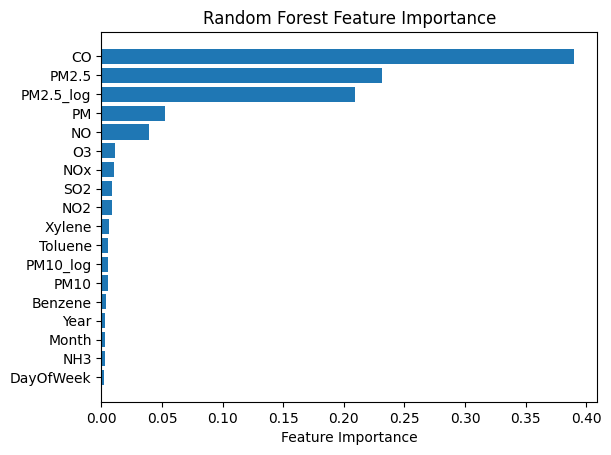

In [ ]:
# Get feature importance
feature_importance = rf_model.feature_importances_

# Sort the importance
sorted_idx = feature_importance.argsort()

# Plot feature importance
import matplotlib.pyplot as plt

plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}


In [ ]:
# Initialize GridSearchCV with Random Forest Regressor
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all CPU cores
                           verbose=2,
                           scoring='neg_mean_absolute_error')  # Minimize MAE


In [ ]:
param_grid = {
    'n_estimators': [50, 100],  # Reduced number of trees
    'max_depth': [None, 10],  # Limiting maximum depth
    'min_samples_split': [2, 5],  # Limiting possible splits
    'min_samples_leaf': [1, 2],  # Limiting leaf nodes
    'bootstrap': [True]  # Keeping bootstrap=True only
}


In [ ]:
param_grid = {
    'n_estimators': [50],  # Try just one option for now
    'max_depth': [None, 10],  # Only two options
    'min_samples_split': [2],  # Only one option
    'min_samples_leaf': [1],   # Only one option
    'bootstrap': [True]        # Only True for now
}

random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_grid,
                                   n_iter=5,  # Reduce iterations for faster results
                                   cv=3,  # Use 3-fold cross-validation
                                   n_jobs=-1,  # Use all CPU cores
                                   verbose=2,  # Show more progress
                                   random_state=42,
                                   scoring='neg_mean_absolute_error')  # Minimize MAE


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for categorical variables (e.g., 'City')
label_encoder = LabelEncoder()
filtered_data['City'] = label_encoder.fit_transform(filtered_data['City'])



In [ ]:
# One-hot encoding for the 'City' column
filtered_data = pd.get_dummies(filtered_data, columns=['City'], drop_first=True)


In [ ]:
# Check the data types
print(filtered_data.dtypes)

# Check for any remaining non-numeric columns


Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
PM                   float64
PM2.5_log            float64
PM10_log             float64
Year                   int32
Month                  int32
DayOfWeek              int32
City_1                  bool
City_2                  bool
City_3                  bool
City_4                  bool
City_5                  bool
City_6                  bool
City_7                  bool
City_8                  bool
City_9                  bool
City_10                 bool
City_11                 bool
City_12                 bool
City_13                 bool
City_14       

In [ ]:
# Drop the 'Date' column as it's not needed anymore
X = filtered_data.drop(['AQI', 'AQI_Bucket', 'Date'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Random Forest - Mean Absolute Error (MAE): {mae}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse}")
print(f"Random Forest - R² Score: {r2}")


Random Forest - Mean Absolute Error (MAE): 20.686393948160255
Random Forest - Root Mean Squared Error (RMSE): 42.69598524510112
Random Forest - R² Score: 0.9033459825564503


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


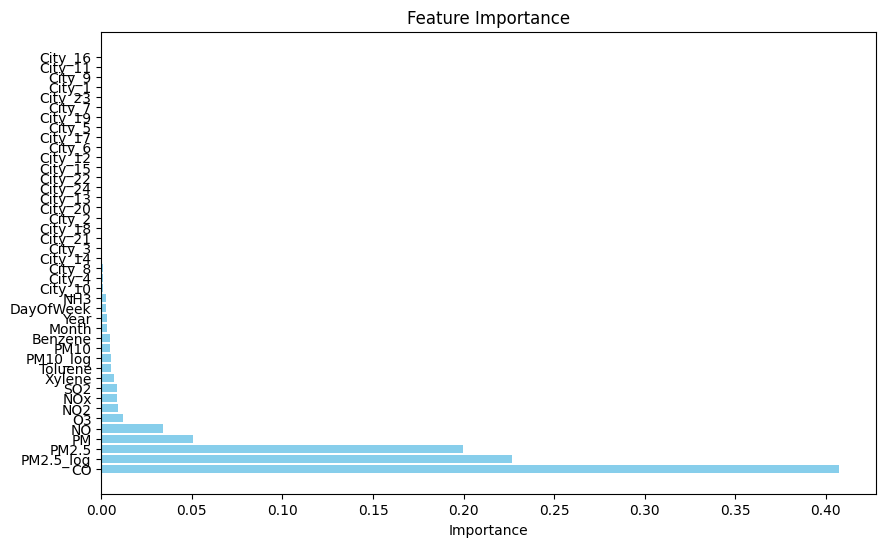

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train and y_train are already defined

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Fit the model on training data

# Now get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to hold feature names and their corresponding importance
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(rf_model, 'random_forest_aqi_model.pkl')


['random_forest_aqi_model.pkl']

In [ ]:
# Load the saved model
loaded_rf_model = joblib.load('random_forest_aqi_model.pkl')


In [ ]:
# Load the saved model
loaded_rf_model = joblib.load('random_forest_aqi_model.pkl')

# Now, make predictions on the test set (or new data if available)
y_pred_loaded = loaded_rf_model.predict(X_test)

# Evaluate the loaded model's performance
mae_loaded = mean_absolute_error(y_test, y_pred_loaded)
rmse_loaded = mean_squared_error(y_test, y_pred_loaded, squared=False)
r2_loaded = r2_score(y_test, y_pred_loaded)

# Print the evaluation metrics for the loaded model
print(f"Loaded Model - Mean Absolute Error (MAE): {mae_loaded}")
print(f"Loaded Model - Root Mean Squared Error (RMSE): {rmse_loaded}")
print(f"Loaded Model - R² Score: {r2_loaded}")


Loaded Model - Mean Absolute Error (MAE): 20.686393948160255
Loaded Model - Root Mean Squared Error (RMSE): 42.69598524510112
Loaded Model - R² Score: 0.9033459825564503


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


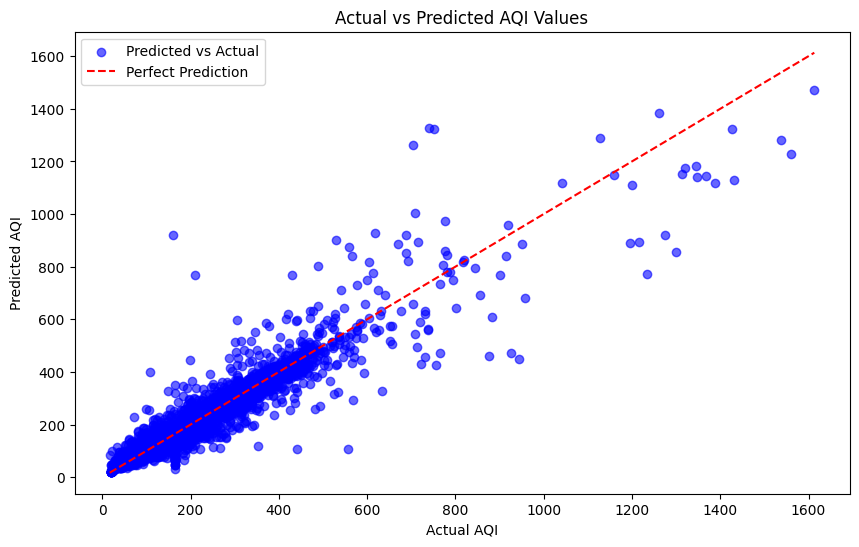

In [ ]:
# Assuming you loaded the model and now making predictions
y_pred = rf_model.predict(X_test)  # Use your trained model for prediction

# Plotting Actual vs Predicted AQI values
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Line of perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI Values')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define a sample model
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(100,)),  # Input layer
        Dropout(0.3),  # Dropout layer for regularization
        Dense(64, activation='relu'),  # Hidden layer
        Dense(10, activation='softmax')  # Output layer
    ])
    return model

# Create the model
model = create_model()

# Compile the model (optional for summary generation)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Generate the summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,834 (85.29 KB)

 Trainable params: 21,834 (85.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models
gb_model = GradientBoostingRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)  # Your existing model

# Train models
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate and compare models using metrics like MAE, RMSE, R-squared, etc.
# ... (Refer to your existing evaluation code)

NameError: name 'X_train' is not defined